# Recados

- 14/06: Aula 8 - cluster hierarquico
- 16/06: Feriado
- 17/06: Não tem aula
- 21/06: Aula 9 - avaliação por rubrica / revisão / prova
- Recesso
- 12/07: Aula 1 - MLIII
- 29/07: Aula 9: revisão e entrega do projeto

# Aula 08 - Aglomerando para conquistar

### Objetivos
Apresentar algoritmo de agrupamento hierárquico

### Habilidades a serem desenvolvidas
Ao final da aula o aluno deve saber:

- Hierarchical Clustering

### Bibliotecas usadas
- Pandas;
- Numpy;
- Matplotlib;
- Seaborn;
- Sklearn.


### Referências

<ul>
    <li><a href="https://www.youtube.com/watch?v=cSo1k7fw5FY">Scikit Learn Tutorial #7 - Clustering Algorithms</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Hierarchical_clustering">Hierarchical Clustering (Wikipedia)</a></li>
    <li><a href="https://github.com/albert-cyberhulk/hierarchical-clustering-using-r-and-python">Hierarchical Clustering Example (Albert Cyberhulk)</a></li>
    
</ul>

## Hierarchical clustering

O clustering hierárquico (também chamado de análise de cluster hierárquica ou HCA) é um método de análise de cluster que busca construir uma hierarquia de clusters.

Existem 2 tipos de agrupamento hierárquico:
- <b> Aglomerativo </b> (de baixo para cima) e
- <b> Divisivo </b> (de cima para baixo).

Os algoritmos ascendentes tratam cada ponto de dados como um único cluster e mesclam os clusters mais próximos e sobem na hierarquia até que todos os clusters tenham sido mesclados e haja apenas um único cluster com todos os pontos de dados restantes.

Os algoritmos de cima para baixo são o oposto dos algoritmos de baixo para cima. Eles começam com um cluster que contém todos os pontos de dados e, em seguida, executa divisões e desce na hierarquia. Podemos visualizar a hierarquia usando um <a href="https://en.wikipedia.org/wiki/Dendrogram"> dendrograma </a> ou árvore.

___
Métodos Aglomerativos: nesse caso, todos os elementos começam separados e vão sendo agrupados em etapas, um a um, até que tenhamos um único cluster com todos os elementos. O número ideal de clusters é escolhido dentre todas as opções.  
Métodos Divisivos: no método divisivo todos os elementos começam juntos em um único cluster, e vão sendo separados um a um, até que cada elemento seja seu próprio cluster. Assim como no método aglomerativo, escolhemos o número ótimo de clusters dentre todas as possíveis combinações.
__
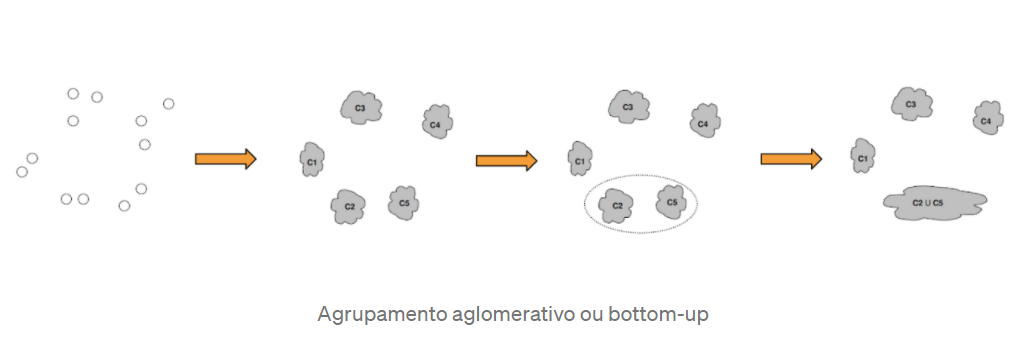
http://www.vision.ime.usp.br/~pmiranda/mac6903_2s12/aulas/aula18.pdf



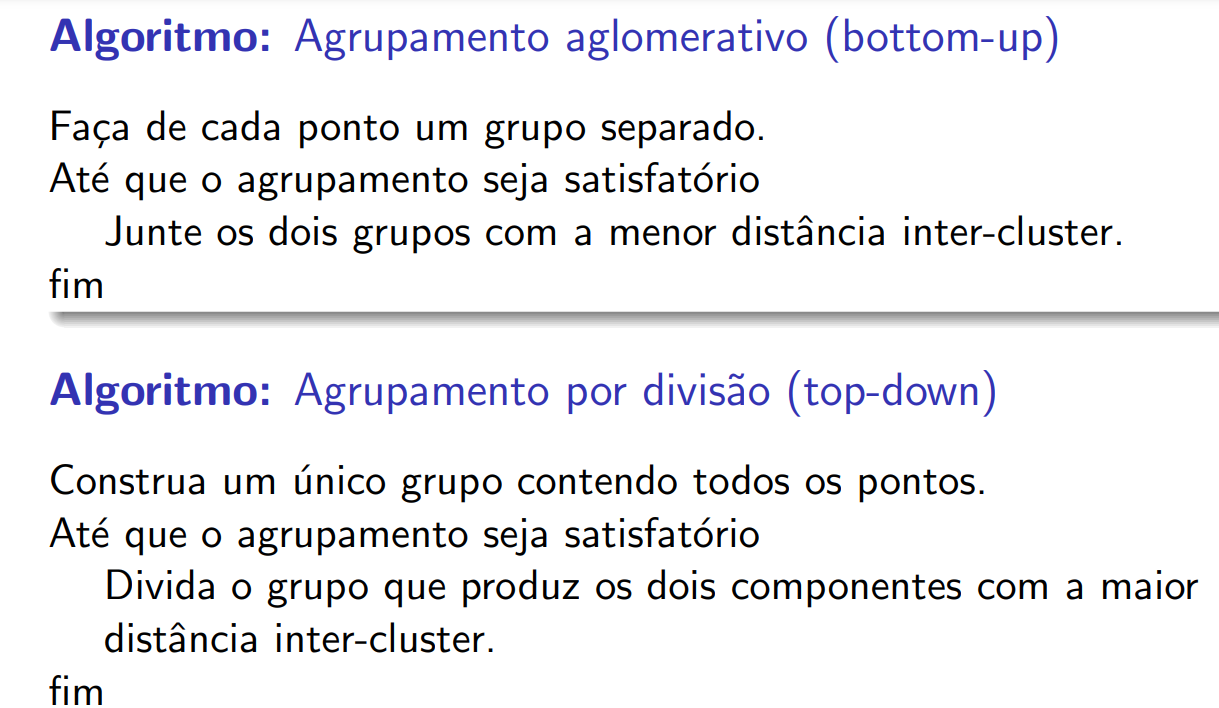
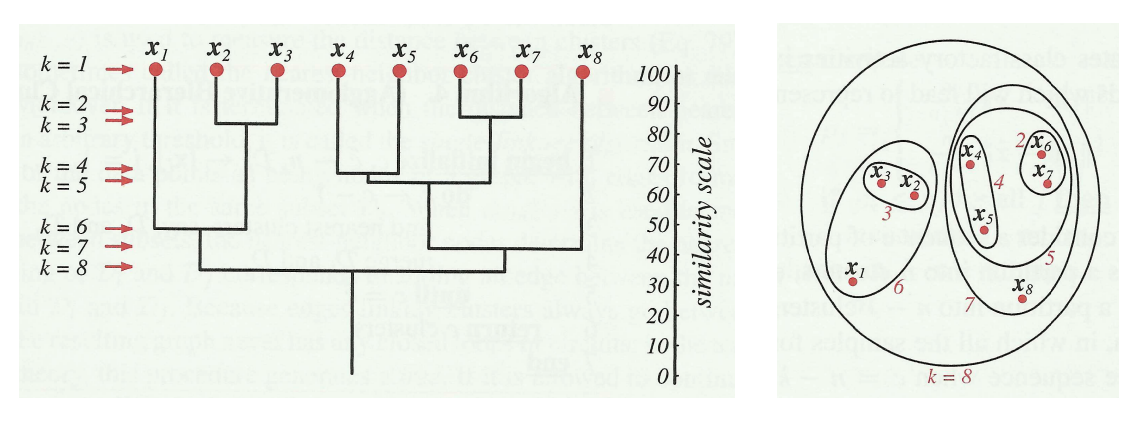



No gráfico abaixo, você pode ver um exemplo de como funciona o agrupamento hierárquico ascendente.
<img style="height:400px;"  src="https://miro.medium.com/max/257/0*iozEcRXXWXbDMrdG.gif">
<img style="height:400px;"  src="https://miro.medium.com/max/480/0*BfO2YN_BSxThfUoo.gif">


Passos (aglomerativo):
1. Trate cada ponto de dados como um único cluster.
2. Escolha uma medida de similaridade / dissimilaridade (métrica de distância como distância euclidiana, como uma medida de similaridade, e um critério de ligação que especifica a dissimilaridade de conjuntos como uma função das distâncias entre pares de observações).
3. Combine os dois clusters com a menor ligação, ou seja, os dois clusters que estão mais próximos de acordo com nossa medida escolhida.
4. Repita 3 até que tenhamos apenas um cluster com todos os pontos de dados.
5. Escolha quantos aglomerados queremos olhando para o dendrograma.

<img style="height:600px;"  src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/800px-Iris_dendrogram.png">

- O clustering hierárquico não exige que especifiquemos o número de clusters e podemos até selecionar qual número de clusters parece melhor, já que estamos construindo uma árvore.
- Além disso, o algoritmo não é sensível à escolha da métrica de distância; todos eles tendem a funcionar igualmente bem, enquanto com outros algoritmos de agrupamento, a escolha da métrica de distância é crítica.
- Um caso de uso particularmente bom de métodos de agrupamento hierárquico é quando os dados subjacentes têm uma estrutura hierárquica e você deseja recuperar a hierarquia; outros algoritmos de cluster não podem fazer isso.
- Essas vantagens do agrupamento hierárquico têm o custo de menor eficiência, pois tem uma complexidade de tempo de O (n³), ao contrário da complexidade linear de K-Means e GMM.

PS. O objeto AgglomerativeClustering executa um agrupamento hierárquico usando uma abordagem ascendente: cada observação começa em seu próprio cluster, e os clusters são sucessivamente mesclados. Os critérios de ligação determinam a métrica usada para a estratégia de fusão:
- **Ward** minimiza a soma das diferenças quadradas em todos os clusters. É uma abordagem de minimização de variância e, nesse sentido, é semelhante à função objetivo k-means, mas tratada com uma abordagem hierárquica aglomerativa.
- **A ligação máxima ou completa** minimiza a distância máxima entre as observações de pares de agrupamentos.
- **A ligação média** minimiza a média das distâncias entre todas as observações de pares de agrupamentos.
- **A ligação única** minimiza a distância entre as observações mais próximas de pares de clusters.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png)

https://medium.com/@will.lucena/agrupamento-hier%C3%A1rquico-329e30a9f32d

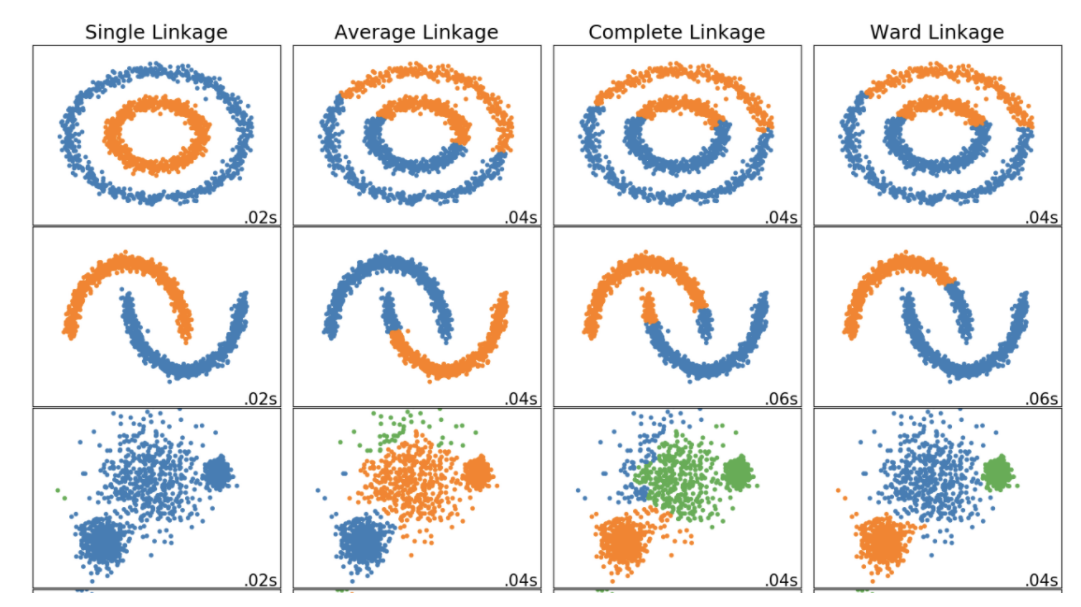

https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8
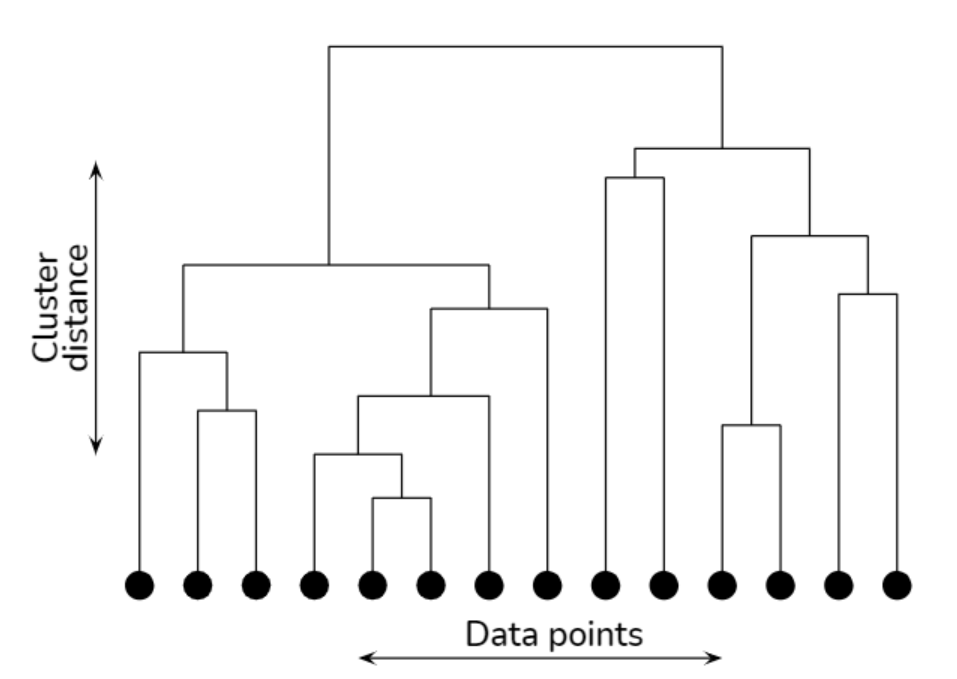
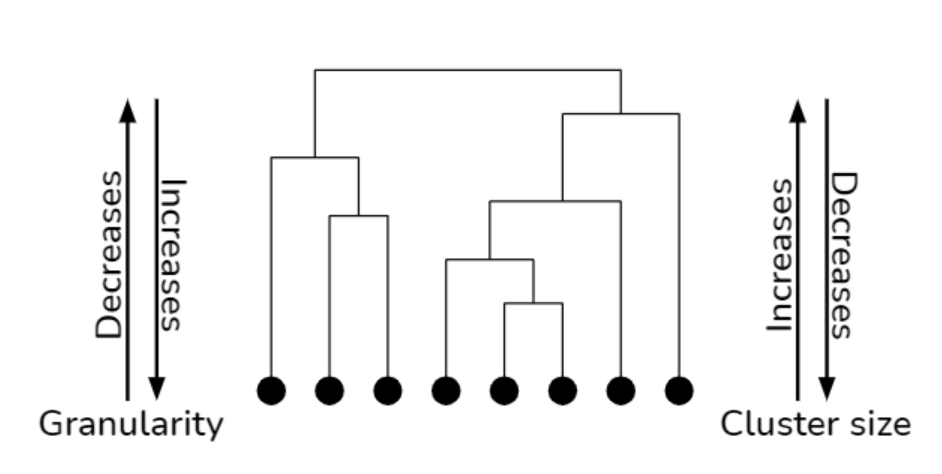
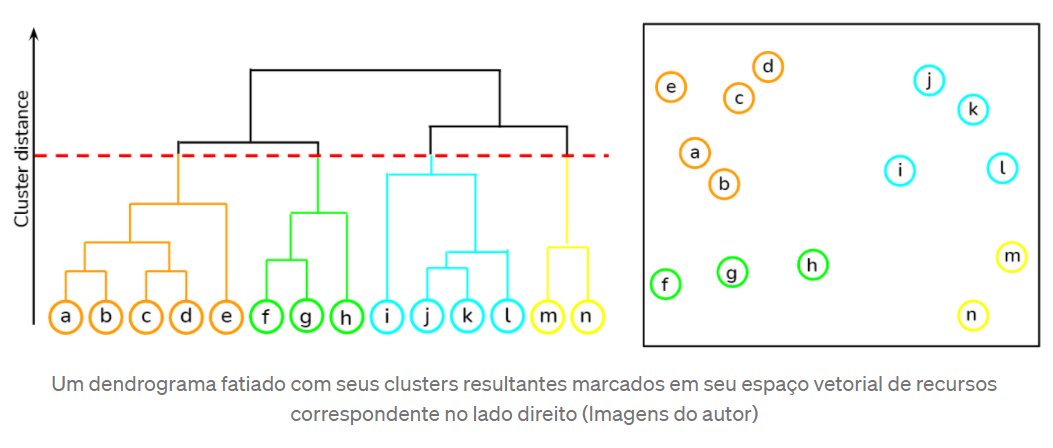
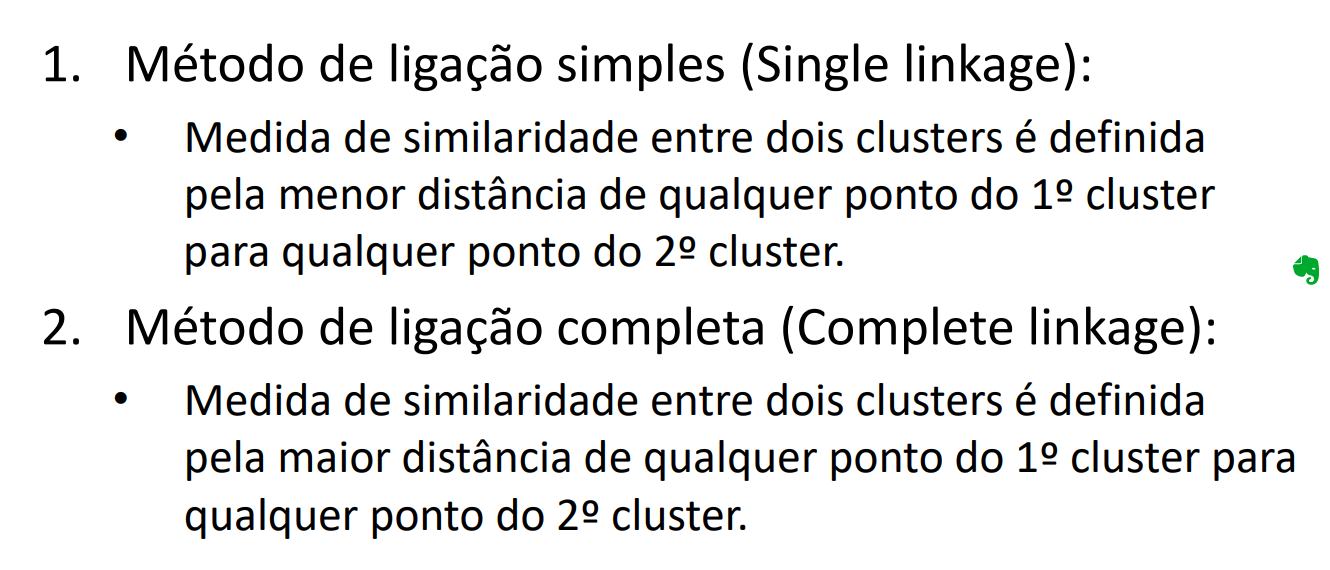
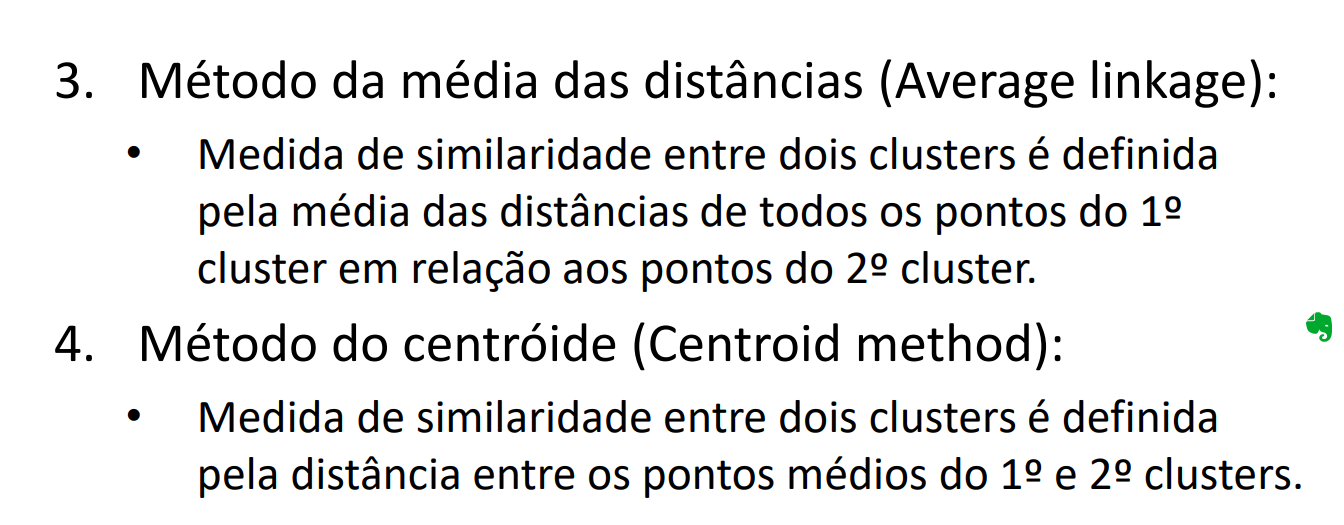
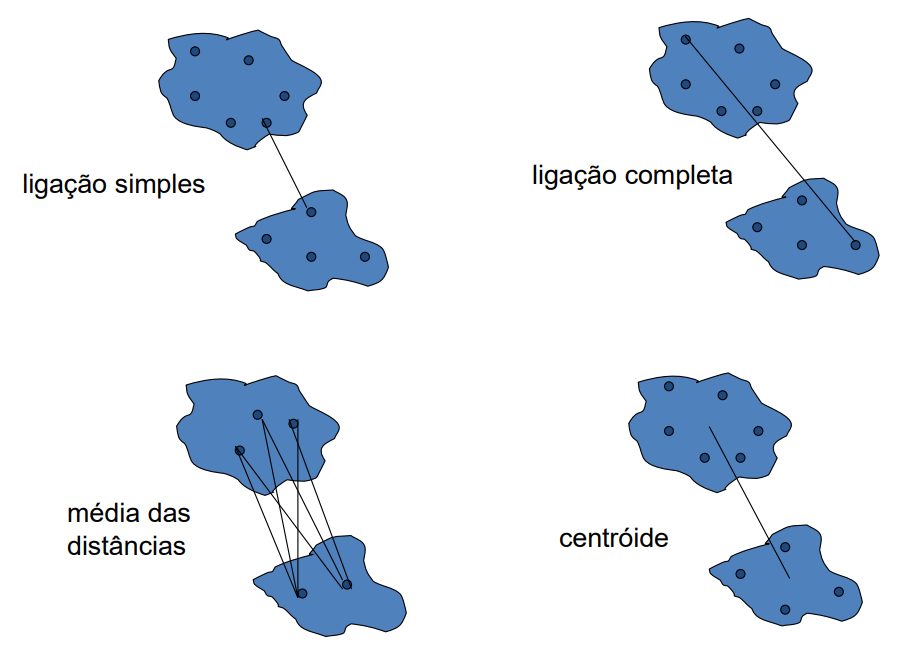
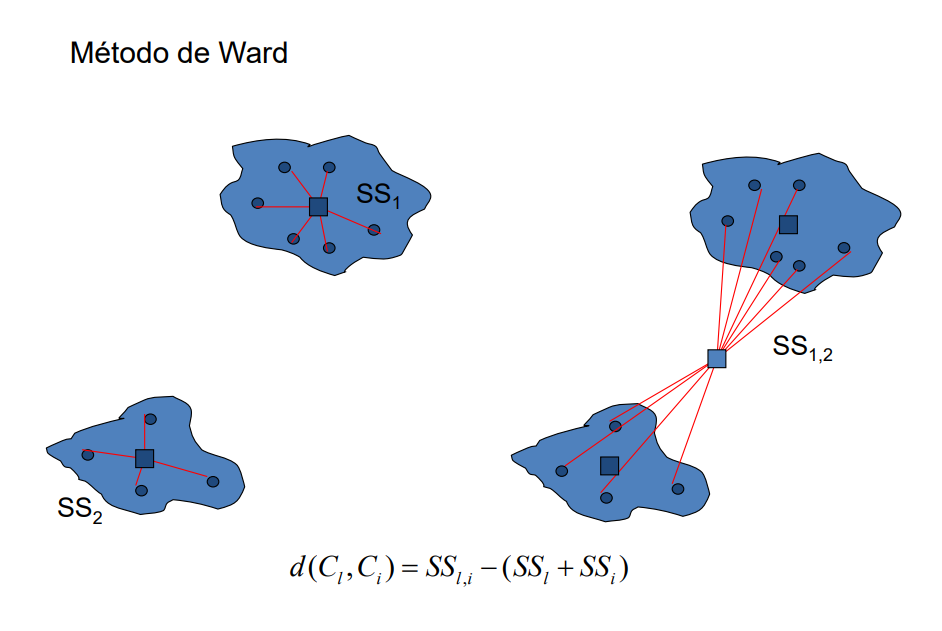
http://www.each.usp.br/lauretto/cursoR2017/04-AnaliseCluster.pdf



https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html



In [27]:
dataset = pd.read_csv('../datasets/Mall_Customers.csv')

In [28]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
X = dataset.iloc[:, [3, 4]].values

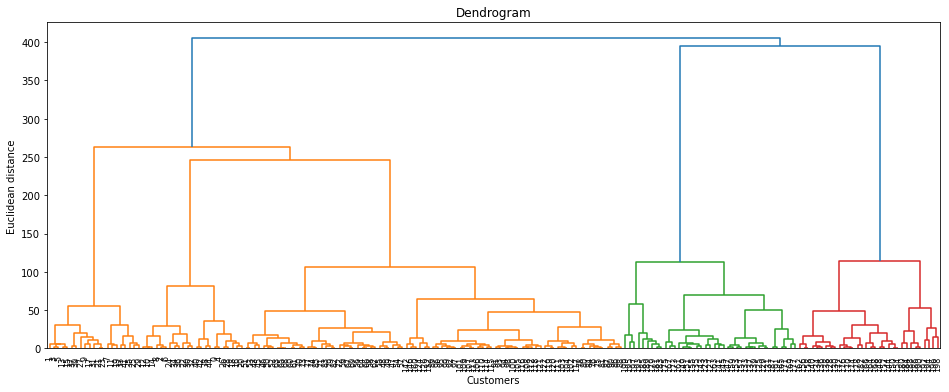

In [30]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,6))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),leaf_rotation=90.,leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()



In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

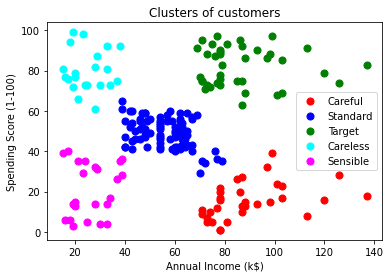

In [32]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
# model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# model.fit(X)
# labels = model.labels_